In [72]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np



In [73]:
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()

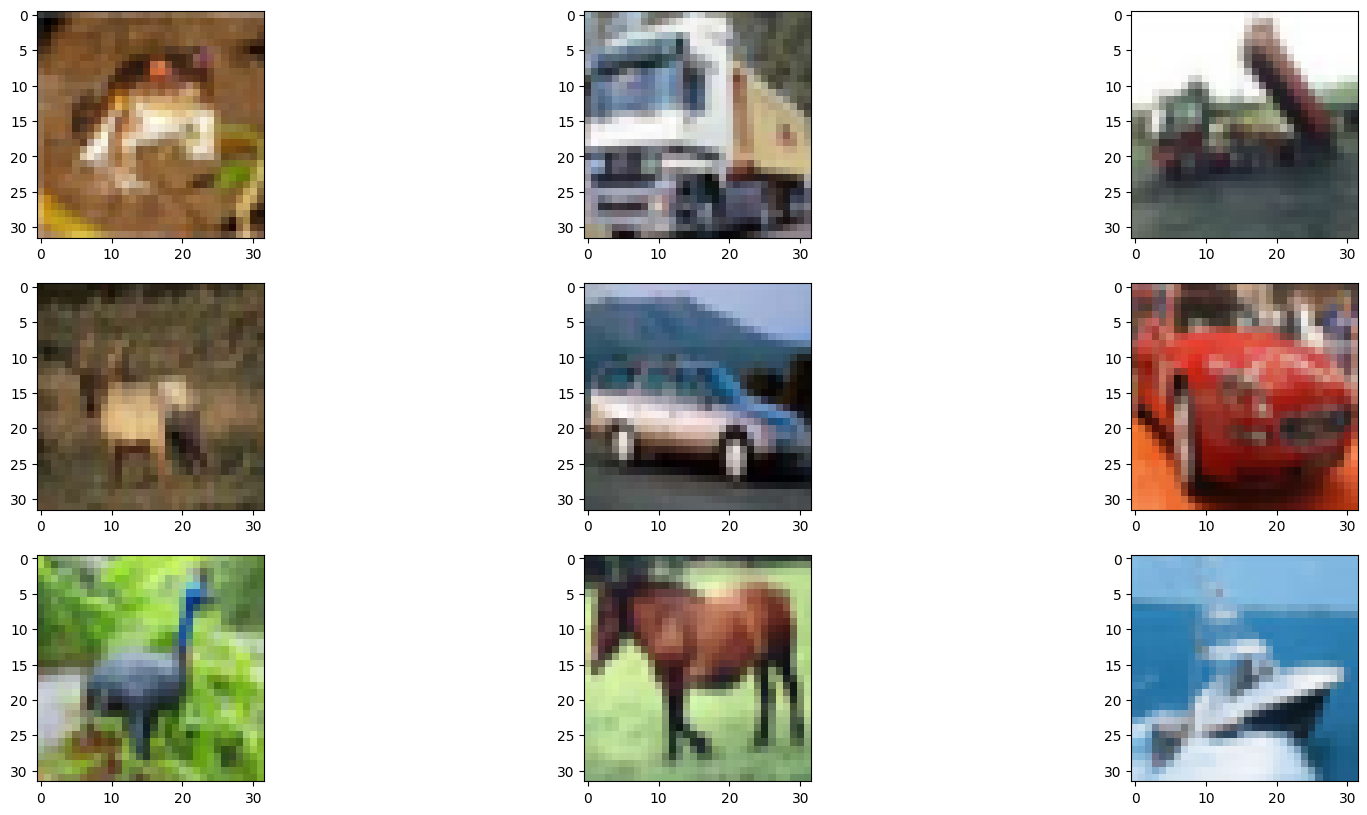

In [74]:
n=9
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i])
plt.show()

In [75]:
import cv2 
X_train_grayscale = np.zeros(X_train.shape[:-1])
for i in range(X_train.shape[0]): 
    X_train_grayscale[i] = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2GRAY)
X_train = X_train_grayscale

X_test_grayscale = np.zeros(X_test.shape[:-1])
for i in range(X_test.shape[0]): 
    X_test_grayscale[i] = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2GRAY)
X_test = X_test_grayscale

In [76]:
X_train_grayscale.shape

(50000, 32, 32)

In [77]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [79]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [80]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train= X_train/255
X_test= X_test/255

In [81]:
model = Sequential()
model.add(Flatten(input_shape=[32,32]))
model.add(Dense(512, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 1024)              0         
                                                                 
 dense_20 (Dense)            (None, 512)               524800    
                                                                 
 dense_21 (Dense)            (None, 300)               153900    
                                                                 
 dense_22 (Dense)            (None, 100)               30100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 709,810
Trainable params: 709,810
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [83]:
model.fit(X_train, Y_train, epochs = 50, batch_size = 128, validation_data=[X_test,Y_test])

Epoch 1/50
391/391 [==============================] - 3s 6ms/step - loss: 2.1055 - accuracy: 0.2318 - val_loss: 2.0786 - val_accuracy: 0.2516
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.9237 - accuracy: 0.3103 - val_loss: 2.0020 - val_accuracy: 0.2803
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.8398 - accuracy: 0.3424 - val_loss: 1.8101 - val_accuracy: 0.3559
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7800 - accuracy: 0.3656 - val_loss: 1.9345 - val_accuracy: 0.3130
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7310 - accuracy: 0.3848 - val_loss: 1.6985 - val_accuracy: 0.3927
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 1.6848 - accuracy: 0.3992 - val_loss: 1.8028 - val_accuracy: 0.3606
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 1.6492 - accuracy: 0.4142 - val_loss: 1.7624 - val_accuracy: 0.3707
Epoch 

In [64]:
test_loss,test_acc=model.evaluate(X_test,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 2.8902 - accuracy: 0.4252


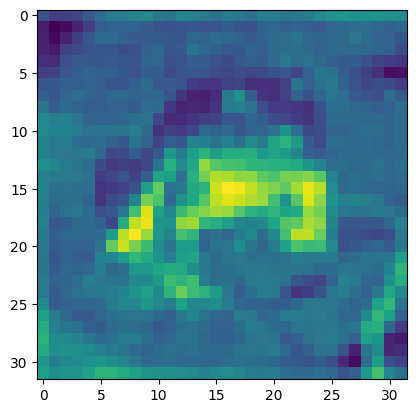

In [65]:
plt.imshow(X_train[0])

In [70]:
from keras.utils.image_utils import load_img
image = load_img('img/horse.jpeg', target_size=(32,32),color_mode="grayscale") #,grayscale=True


In [67]:
classnames = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

1/1 [==============================] - 0s 15ms/step
horse


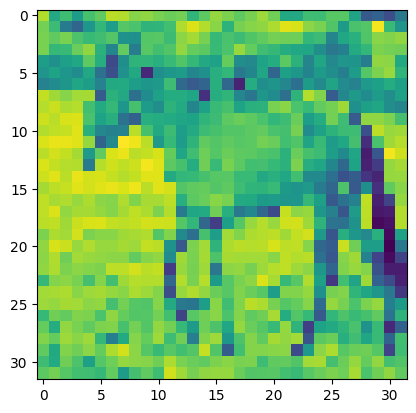

In [71]:
from keras.utils.image_utils import img_to_array
img = img_to_array(image)
img = img.reshape(1,32,32)
img = img.astype('float32')
img = img/255
tag = np.argmax(model.predict(img),axis=1)
plt.imshow(image)
print(classnames[tag[0]])